In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
train = pd.read_csv('train.csv')

In [132]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

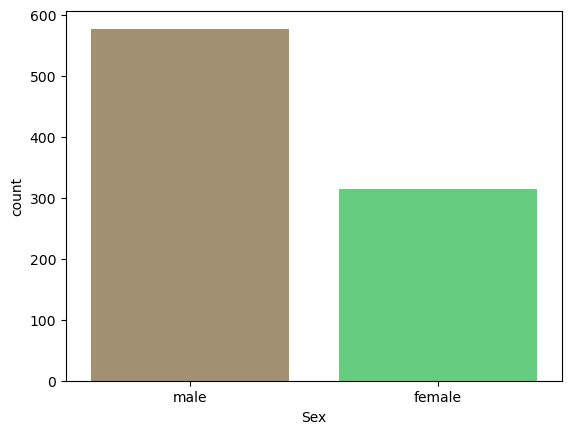

In [15]:
sns.countplot(x='Sex', data=train, palette="terrain_r")

In [19]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

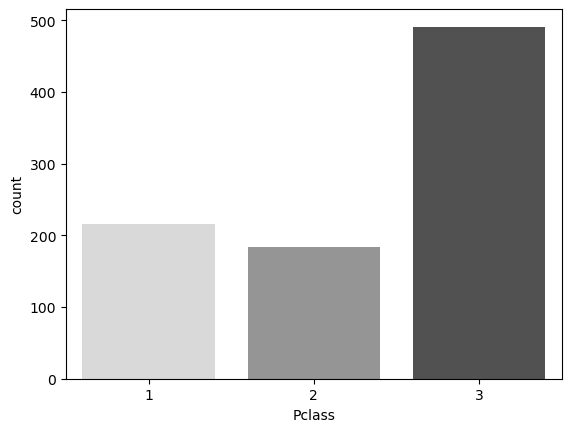

In [21]:
sns.countplot(x='Pclass', data=train, palette="Greys")

In [133]:
train = train.drop(['Cabin'],axis=1)

In [134]:
train['Age'].fillna(value = train['Age'].mean().round(0), inplace=True)

In [135]:
train = train.dropna(subset=['Embarked'])

In [136]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [137]:
train['Died'] = 1 -train['Survived']

C:\Users\DELL\AppData\Local\Temp\ipykernel_27724\2673078176.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


<Axes: >

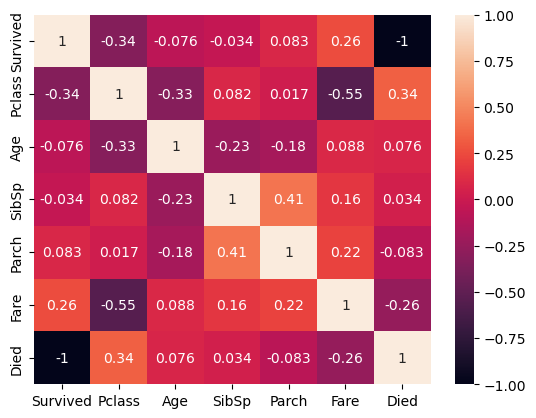

In [34]:
corr = train.corr()
sns.heatmap(corr,annot=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_27724\233457669.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar',


<Axes: xlabel='Sex'>

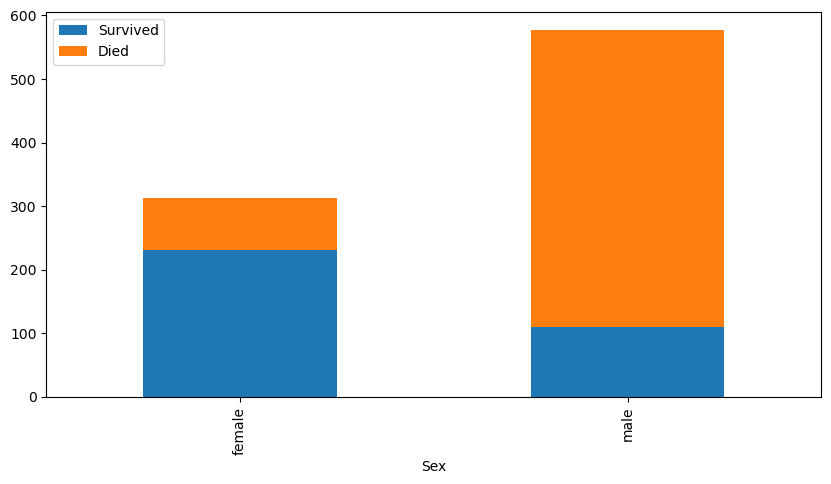

In [40]:
train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)

In [41]:
train.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

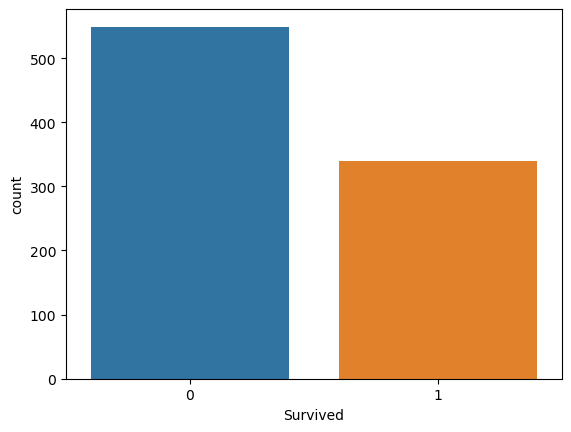

In [42]:
sns.countplot(x = 'Survived', data = train)
plt.show()

In [43]:
train.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           134
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

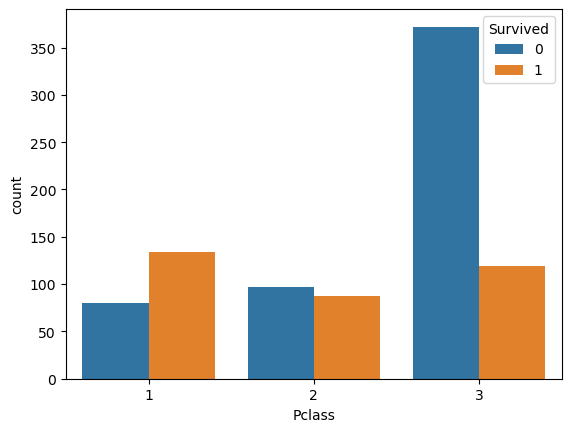

In [64]:
sns.countplot(x='Pclass', hue = 'Survived', data = train,)
plt.show()

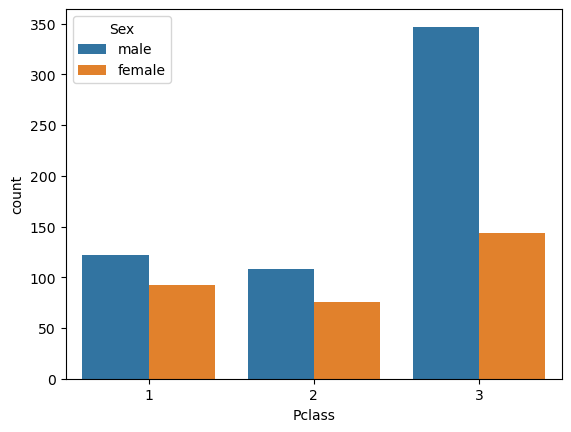

In [61]:
sns.countplot(x='Pclass', hue = 'Sex', data = train)
plt.show()

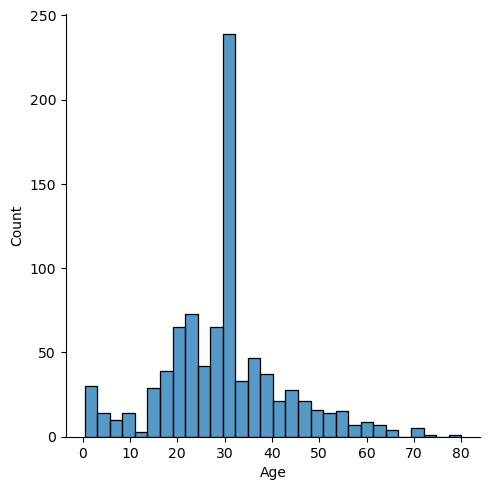

In [63]:
sns.displot(train['Age'])
plt.show()

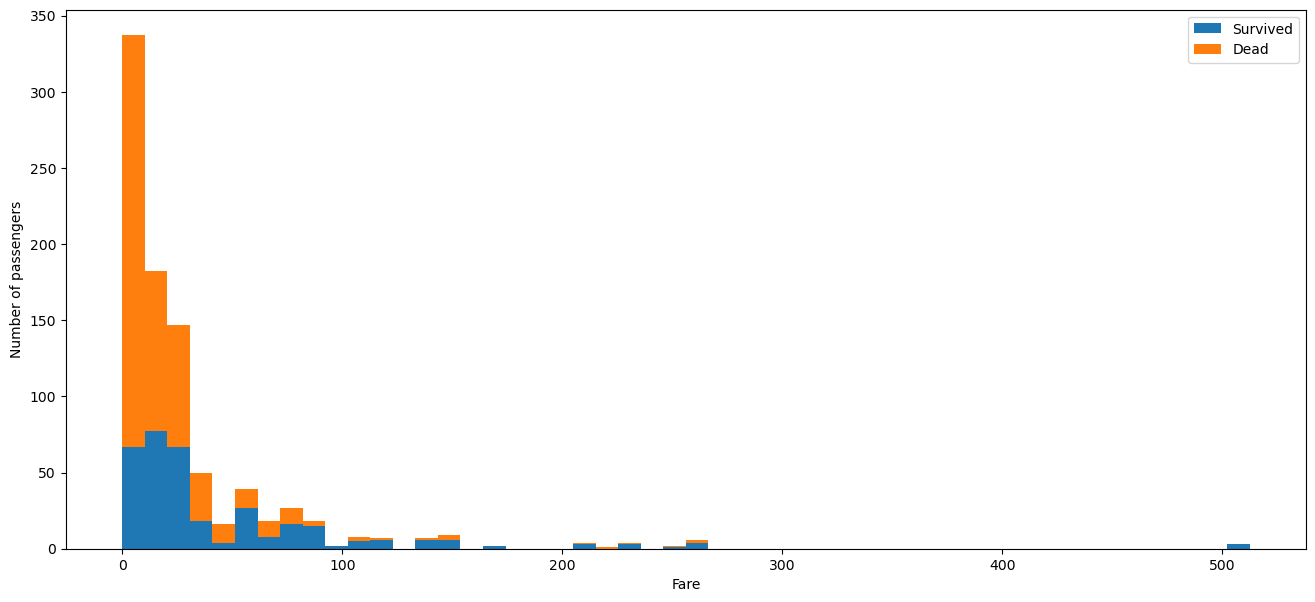

In [65]:
figure = plt.figure(figsize=(16, 7))
plt.hist([train[train['Survived'] == 1]['Fare'], train[train['Survived'] == 0]['Fare']], 
         stacked=True, bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

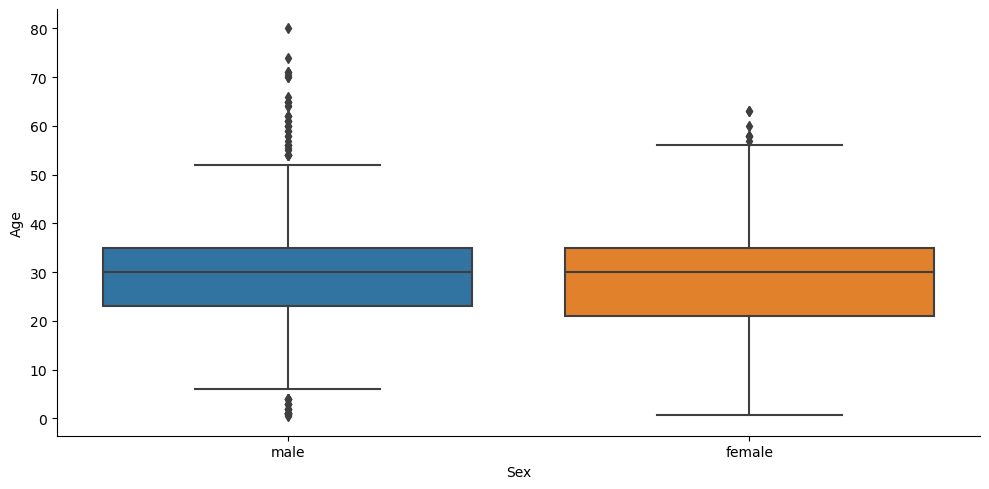

In [67]:
sns.catplot(x = 'Sex', y = 'Age', kind = 'box', data = train, height = 5, aspect = 2)
plt.show()

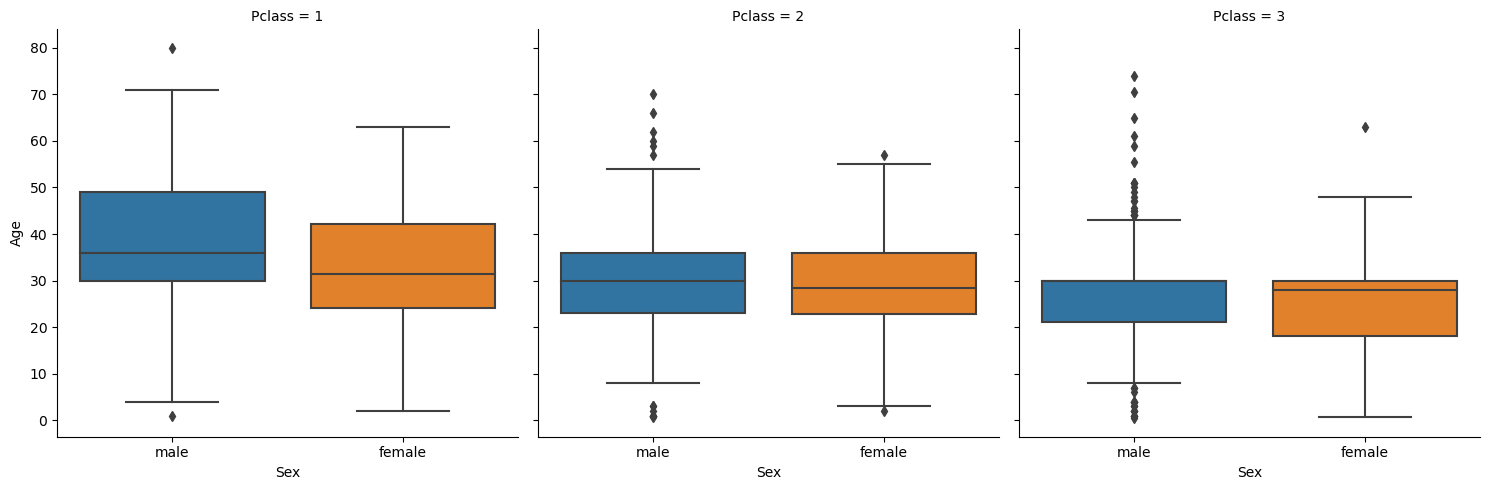

In [68]:
sns.catplot(x = 'Sex', y = 'Age', kind = 'box', data = train, col = 'Pclass')
plt.show()

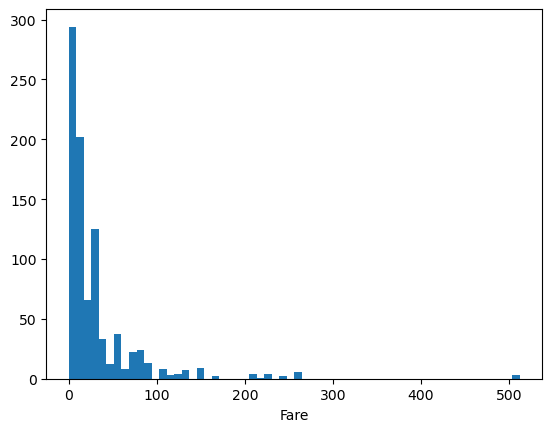

In [69]:
plt.hist(train.Fare, bins = 60)
plt.xlabel('Fare')
plt.show()

In [72]:
train['SibSp'].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_27724\2654242059.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('SibSp').agg('sum')[['Survived', 'Died']].plot(kind='bar',


<Axes: xlabel='SibSp'>

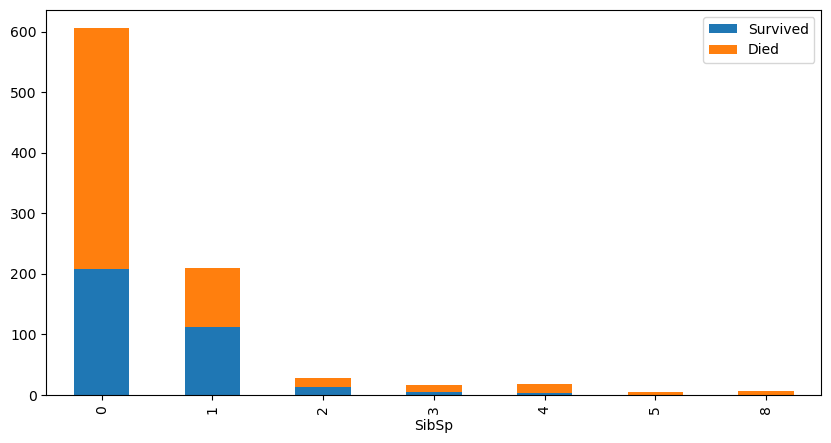

In [73]:
train.groupby('SibSp').agg('sum')[['Survived', 'Died']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)

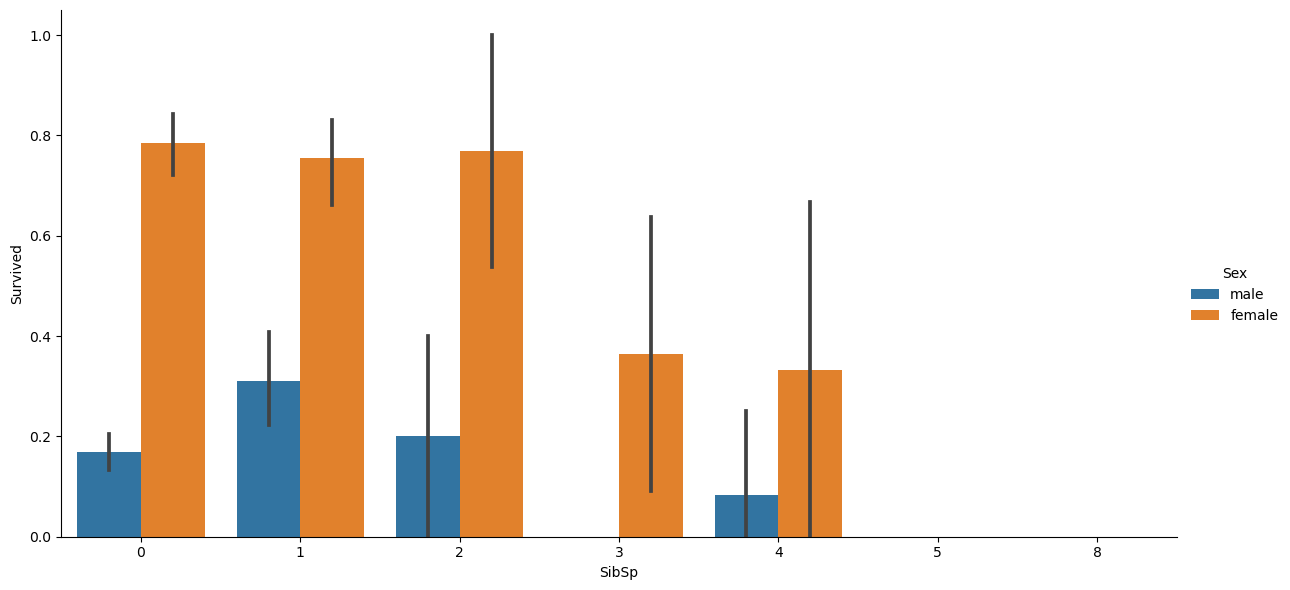

In [76]:
sns.catplot(x = 'SibSp', y = 'Survived', kind = 'bar', hue = 'Sex', data = train, height = 6, aspect = 2)
plt.show()

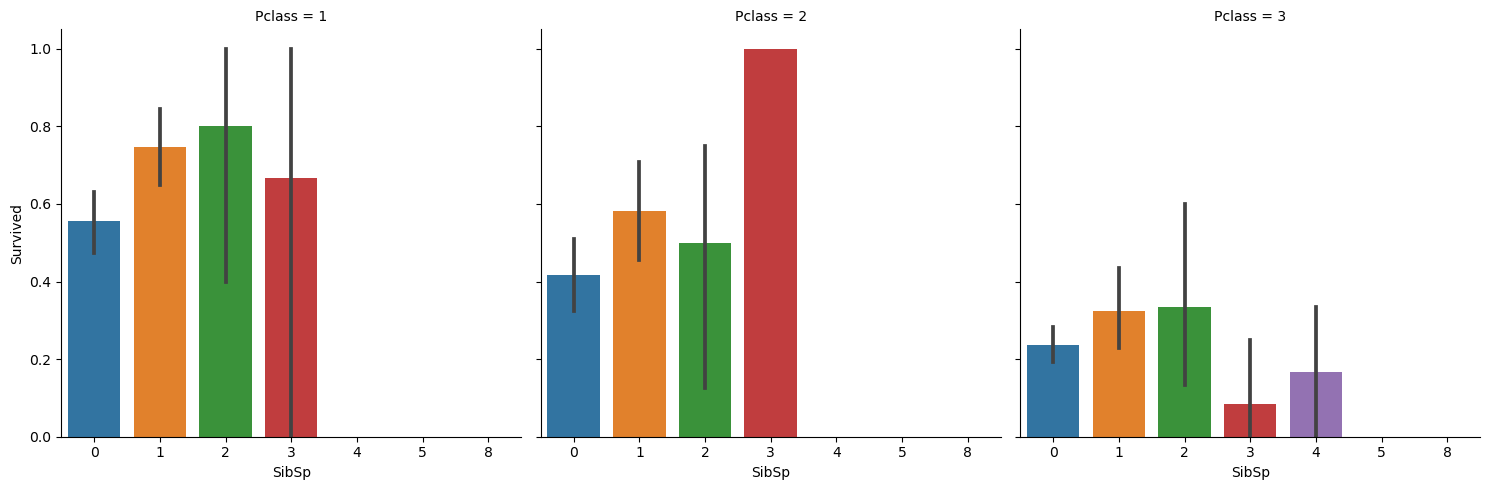

In [75]:
sns.catplot(x = 'SibSp', y = 'Survived', col = 'Pclass', kind = 'bar', data = train)
plt.show()

In [77]:
train.Parch.value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_27724\3481757279.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('Parch').agg('sum')[['Survived', 'Died']].plot(kind='bar',


<Axes: xlabel='Parch'>

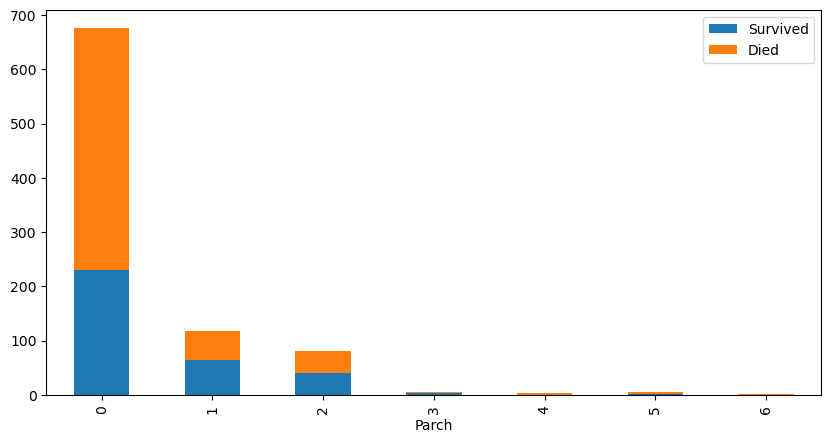

In [79]:
train.groupby('Parch').agg('sum')[['Survived', 'Died']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)

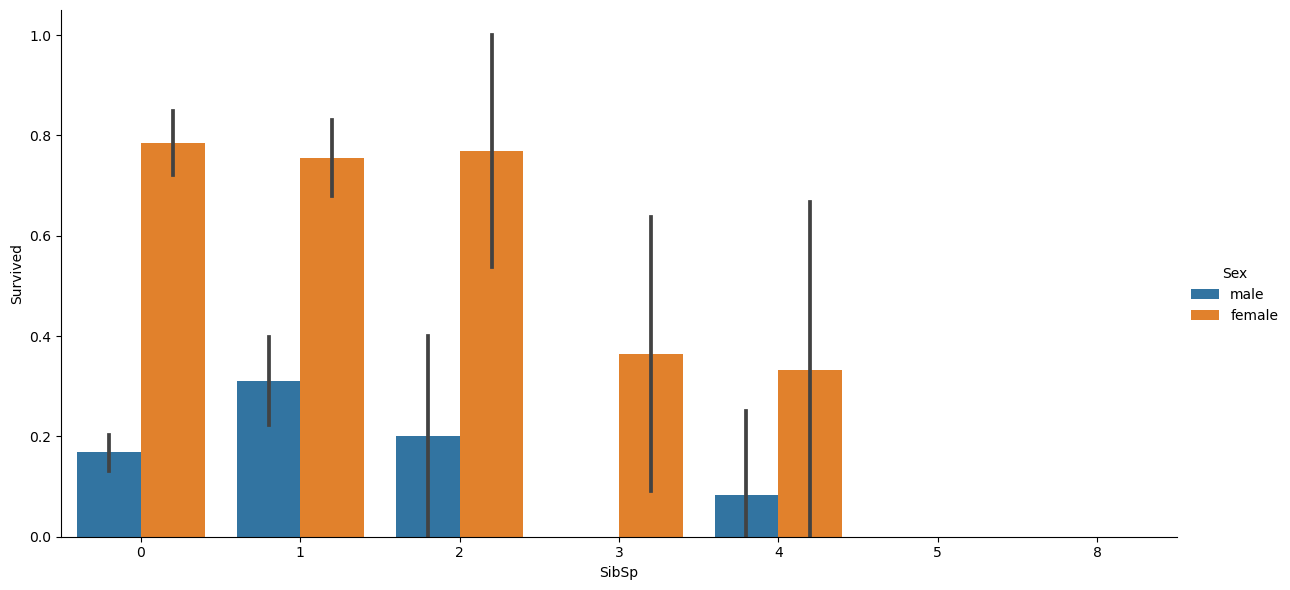

In [80]:
sns.catplot(x = 'SibSp', y = 'Survived', kind = 'bar', hue = 'Sex', data = train, height = 6, aspect = 2)
plt.show()

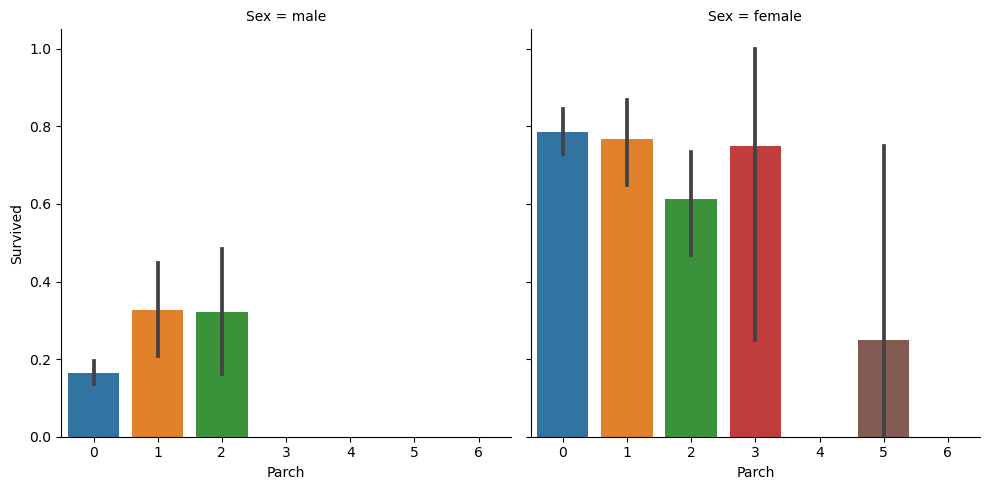

In [81]:
sns.catplot(x = 'Parch',  y = 'Survived', kind = 'bar', col = 'Sex', data = train)
plt.show()

In [82]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_27724\3430571810.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('Embarked').agg('sum')[['Survived', 'Died']].plot(kind='bar',


<Axes: xlabel='Embarked'>

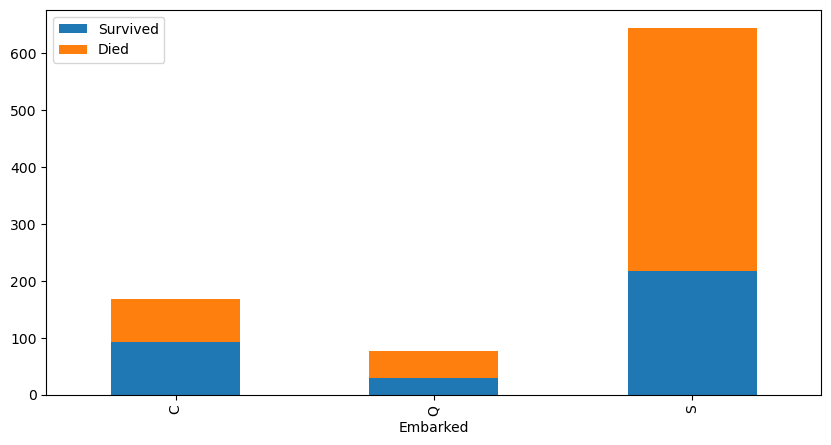

In [83]:
train.groupby('Embarked').agg('sum')[['Survived', 'Died']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)

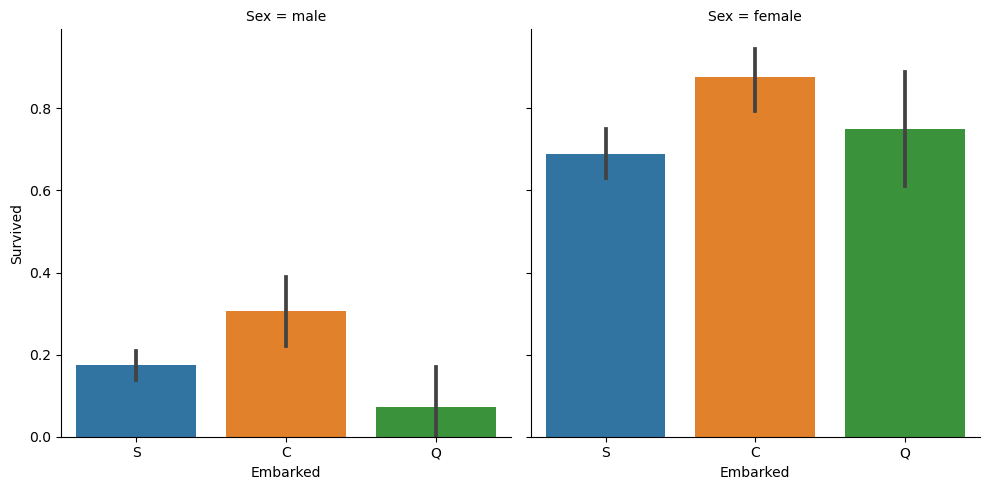

In [84]:
sns.catplot(x = 'Embarked', y = 'Survived', kind = 'bar', data = train, col = 'Sex')
plt.show()

In [138]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Died
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [140]:
df1=train.drop(['Name','Ticket','PassengerId','Died'], axis=1)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [141]:
df1.Sex=df1.Sex.map({'female':0, 'male':1})
df1.Embarked=df1.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'NaN'})
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [142]:
median_age_men=df1[df1['Sex']==1]['Age'].median()
median_age_women=df1[df1['Sex']==0]['Age'].median()

In [143]:
df1.loc[(df1.Age.isnull()) & (df1['Sex']==0),'Age']=median_age_women
df1.loc[(df1.Age.isnull()) & (df1['Sex']==1),'Age']=median_age_men

In [144]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [145]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [146]:
df1.Age = (df1.Age-min(df1.Age))/(max(df1.Age)-min(df1.Age))
df1.Fare = (df1.Fare-min(df1.Fare))/(max(df1.Fare)-min(df1.Fare))

In [147]:
df1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,0.368099,0.524184,0.382452,0.062649
std,0.486260,0.834700,0.477538,0.162970,1.103705,0.806761,0.097003
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.271174,0.000000,0.000000,0.015412
50%,0.000000,3.000000,1.000000,0.371701,0.000000,0.000000,0.028213
75%,1.000000,3.000000,1.000000,0.434531,1.000000,0.000000,0.060508
max,1.000000,3.000000,1.000000,1.000000,8.000000,6.000000,1.000000


# LOGISTIC REGRESSION

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df1.drop(['Survived'], axis=1),
    df1.Survived,
    test_size= 0.2,
    random_state=0,
    stratify=df1.Survived
)

In [150]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

Y_pred = clf.predict(X_test)
accuracy_score(y_test, Y_pred)

0.8370786516853933

In [151]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, Y_pred)
cm

array([[97, 13],
       [16, 52]], dtype=int64)

<Axes: >

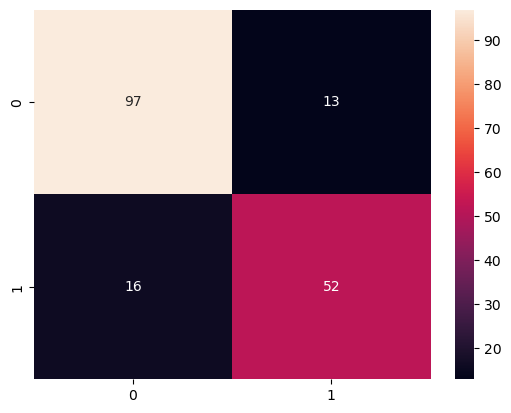

In [152]:
sns.heatmap(cm,annot=True)